In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# plt.style.use('seaborn-v0_8-pastel')
sns.set_theme(style='white')
pd.options.display.max_columns = 200

In [5]:
df = pd.read_csv('../../../data/common_datasets/coaster_db.csv')
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


## Step 1: Data Understanding

In [6]:
df.shape

(1087, 56)

In [7]:
# df.info()

In [8]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


## Step 2: Data Preperation
- Dropping irrelevant columns and rows
- Renaming columns to uniform Column Name
- Ensuring correct dtypes (especially for `datetime` col)
- Identifying duplicated columns
- Feature Creation


In [9]:
df = df[['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
        'latitude', 'longitude','Type_Main', 'opening_date_clean', 'speed_mph', 
        'height_ft','Inversions_clean', 'Gforce_clean']].copy() 
        # .copy() to let Python know this is brand-new df, not a reference from the old df

In [10]:
# dtype casting
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [11]:
# column rename
df = df.rename(columns={
  'opening_date_clean': 'opening_date',
  'Inversions_clean': 'Inversions',
  'Gforce_clean': 'Gforce'
})
df.columns = df.columns.str.lower()


In [12]:
df.columns

Index(['coaster_name', 'location', 'status', 'manufacturer', 'year_introduced',
       'latitude', 'longitude', 'type_main', 'opening_date', 'speed_mph',
       'height_ft', 'inversions', 'gforce'],
      dtype='object')

In [13]:
df.isna().sum() / df.shape[0]

coaster_name       0.000000
location           0.000000
status             0.195952
manufacturer       0.054278
year_introduced    0.000000
latitude           0.252990
longitude          0.252990
type_main          0.000000
opening_date       0.229991
speed_mph          0.137994
height_ft          0.842686
inversions         0.000000
gforce             0.666973
dtype: float64

In [14]:
# check row duplicate
print(df.duplicated().sum())
df = df.loc[~df.duplicated()]

0


In [15]:
df.duplicated(subset=['coaster_name', 'location', 'opening_date']).sum()

97

In [16]:
# check duplicate in each column
df.loc[df.duplicated(subset=['coaster_name', 'location', 'opening_date'])].head()

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,opening_date,speed_mph,height_ft,inversions,gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [17]:
# check an example of duplicates
df.query("coaster_name == 'Crystal Beach Cyclone'")

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,opening_date,speed_mph,height_ft,inversions,gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [18]:
df = df.loc[~df.duplicated(subset=['coaster_name', 'location', 'opening_date'])] \
       .reset_index(drop=True).copy()

In [19]:
df.shape

(990, 13)

## Step 3: Feature Understanding

### Univariate Analysis
- Plotting Feature Distributions
    - Continuous variable
        - Histogram
        - KDE
        - Boxplot 
    - Discrete variable
        - Bar Plot (value_counts)

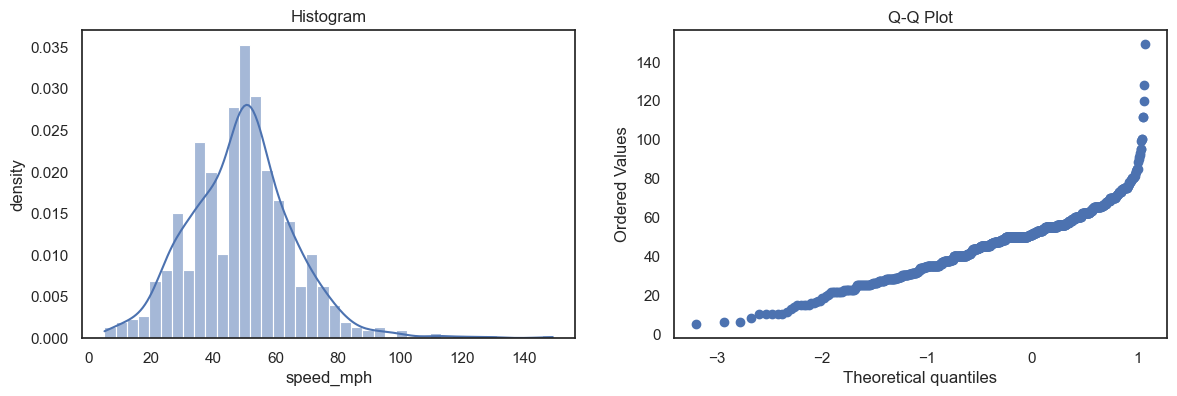

In [20]:
def plot_dist(df, col_name, bin=40, stat='density'):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
    sns.histplot(df, 
                 x=col_name, 
                 bins=bin, 
                 kde=True, 
                 stat=stat,
                 ax=ax1)
    ax1.set(title='Histogram', ylabel=stat, xlabel=col_name)
    
    #Get also the QQ-plot
    stats.probplot(df[col_name], plot=ax2)
    ax2.set_title('Q-Q Plot')
    plt.show()

plot_dist(df, 'speed_mph')

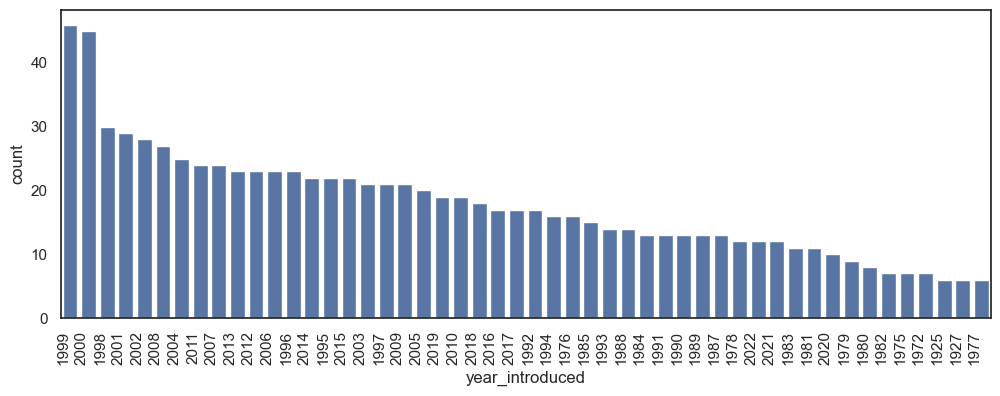

In [21]:
def plot_countplot(df, col_name, limit=None, sort=True, col_asc=True, count_asc=False, rotation=0):
    _ , ax = plt.subplots(figsize=(12,4))

    df = df[col_name].value_counts(ascending=count_asc).reset_index().copy()
    if limit and sort:
        df = df.head(limit)
    if limit and not sort: # if not sort means not sort by count, then sort by col_name's value
        df = df.sort_values(by=col_name, ascending=col_asc).head(limit)
    order = df[col_name] if sort else None

    sns.barplot(data=df, y='count', x=col_name, ax=ax, order=order)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=rotation, ha='right')
    plt.show()

plot_countplot(df, 'year_introduced', limit=50, sort=True, count_asc=False, rotation=90)

## Step 4: Feature Relationships
- Scatterplot & Pairplot
- Heatmap Correlation
- Groupby comparisons

### Scatterplot & Pairplot

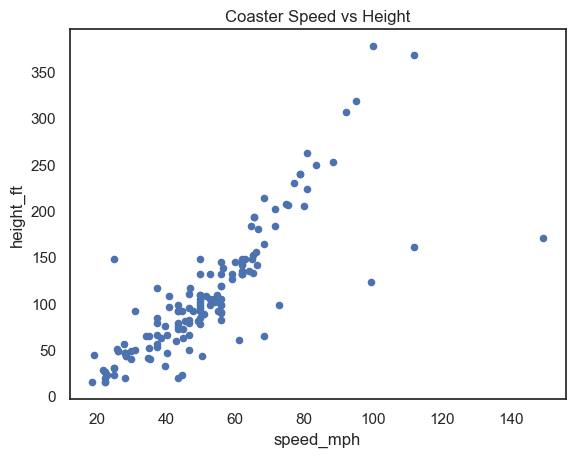

In [22]:
df.plot(kind='scatter',
        x='speed_mph',
        y='height_ft',
        title='Coaster Speed vs Height')
plt.show()

<Axes: xlabel='speed_mph', ylabel='height_ft'>

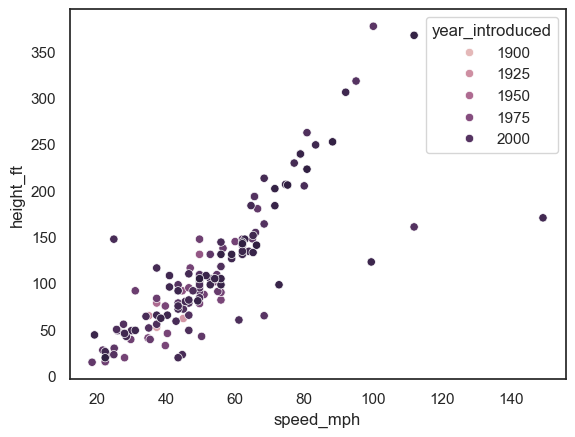

In [23]:
sns.scatterplot(df,
                x='speed_mph',
                y='height_ft',
                hue='year_introduced')

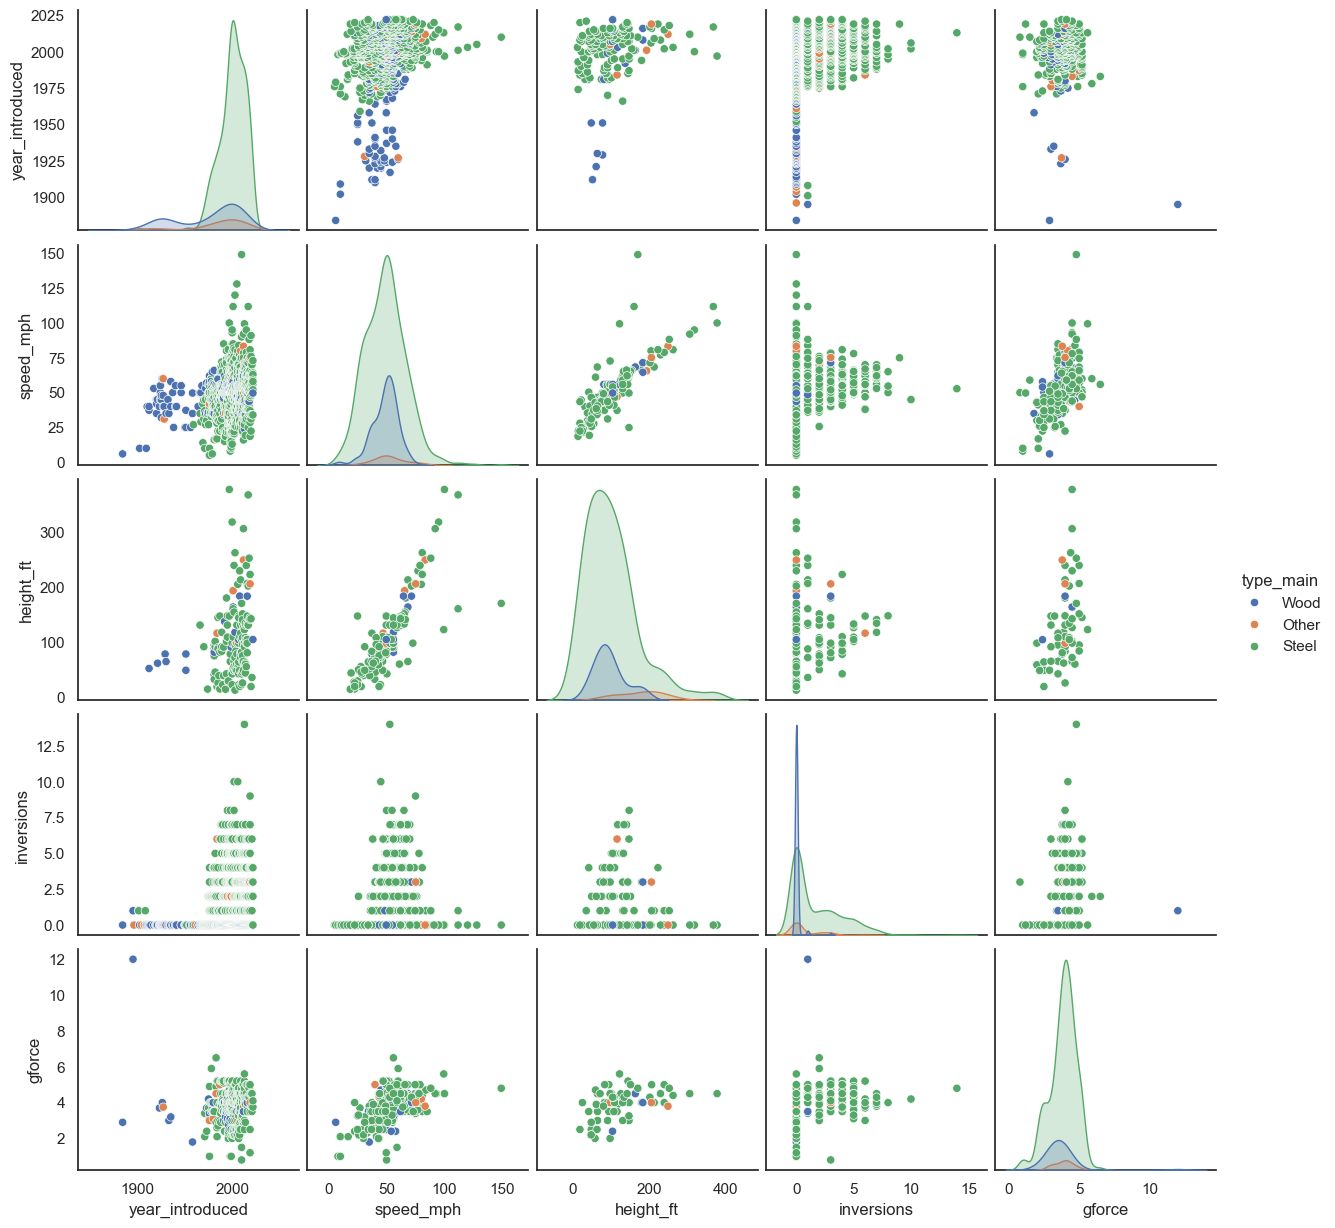

In [24]:
sns.pairplot(df,
             vars=['year_introduced','speed_mph',
                   'height_ft','inversions','gforce'],
              hue='type_main')
plt.show()

### Correlation

In [25]:
df_corr = df[['year_introduced','speed_mph',
              'height_ft','inversions','gforce']].dropna().corr()
df_corr

,year_introduced,speed_mph,height_ft,inversions,gforce
year_introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
gforce,0.160247,0.607383,0.466482,0.275991,1.000000


In [26]:
def plot_heatmap(df_corr, title):
  _, ax = plt.subplots(figsize=(8,6))

  # ones_like can build a matrix of booleans (True, False) with the same shape as our data
  ones_corr = np.ones_like(df_corr, dtype=bool)
  # np's triu: return only upper triangle matrix
  mask = np.triu(ones_corr)
  # When removing the upper tri-angle, here are still two empty cells in our matrix (calories & vitamin)
  adjusted_mask = mask[1:, :-1] 
  adjusted_df_corr = df_corr.iloc[1:, :-1]

  sns.heatmap(data=adjusted_df_corr, mask=adjusted_mask,
              annot=True, annot_kws={"fontsize":12}, fmt=".2f", cmap='Blues',
              vmin=-1, vmax=1,
              linecolor='white', linewidths=0.5);

  yticks = [i.upper() for i in adjusted_df_corr.index]
  xticks = [i.upper() for i in adjusted_df_corr.columns]

  ax.set_yticklabels(yticks, rotation=0, fontsize=10);
  ax.set_xticklabels(xticks, rotation=90, fontsize=10);
  title = f'CORRELATION MATRIX\n{title.upper()}\n'
  ax.set_title(title, loc='left', fontsize=14)
  plt.tight_layout()
  plt.show()

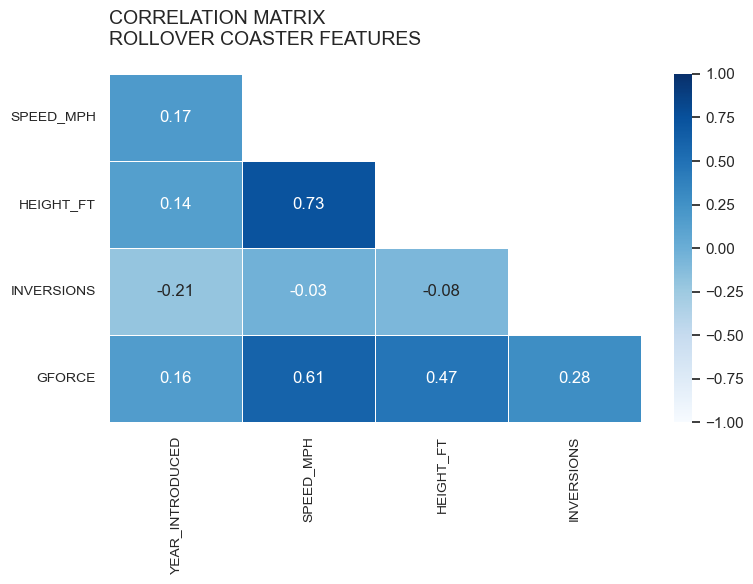

In [27]:
plot_heatmap(df_corr, 'Rollover Coaster Features')

## Step 5: Ask a Question about the data
- What are the locations with the fastest roller coasters (minimum of 10)?

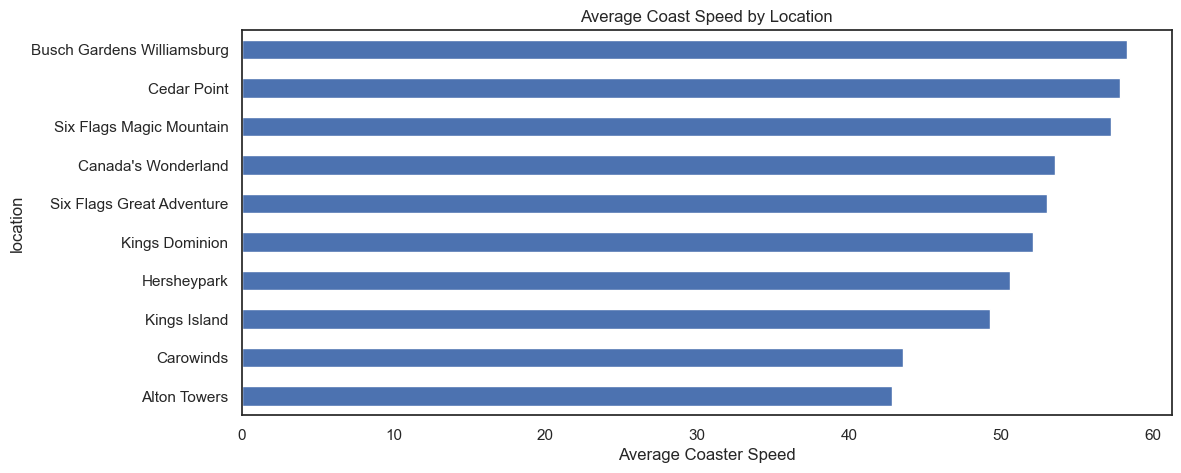

In [28]:
ax = df.query('location != "Other"') \
  .groupby('location')['speed_mph'] \
  .agg(['mean', 'count']) \
  .query('count >= 10') \
  .sort_values(by='mean') \
  .loc[:, 'mean'] \
  .plot(kind='barh', figsize=(12, 5), title='Average Coast Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()